In [140]:
from google.colab import drive
drive.mount('gdrive',force_remount=True)

Mounted at gdrive


In [71]:
!pip install tensorflow==1.13.1

     |████████████████████████████████| 92.5MB 340kB/s 
     |████████████████████████████████| 368kB 39.2MB/s 
     |████████████████████████████████| 3.2MB 27.2MB/s 
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0rc3
    Uninstalling tensorflow-1.15.0rc3:
      Successfully uninstalled tensorflow-1.15.0rc3


In [0]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import keras
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

Using TensorFlow backend.


In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [0]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Input,Flatten,Dropout
from keras import optimizers
from keras.layers.embeddings import Embedding
from keras.layers.merge import concatenate
from keras.layers.normalization import BatchNormalization

from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from keras.models import Model

In [0]:
project_data = pd.read_csv('gdrive/My Drive/preprocessed_data_donors_choose.csv')

In [7]:
project_data.head(3)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00


In [8]:
project_data['project_is_approved'].value_counts()

1    92706
0    16542
Name: project_is_approved, dtype: int64

In [0]:
# scaling the values with mean=0 and std_dev=1 for numerical features
scaler=StandardScaler()
project_data[['teacher_number_of_previously_posted_projects','price']]=scaler.fit_transform(project_data[['teacher_number_of_previously_posted_projects','price']])

In [10]:
#printing the number of word in the 1st essay
print((len(project_data['essay'].values[0].split())))

175


In [0]:
Y=project_data['project_is_approved'].values

In [0]:
# Train test split
train_text,test_text,train_state,test_state,train_grade,test_grade,train_category,test_category,train_sub,test_sub,train_teacher,test_teacher,train_posted,test_posted,train_price,test_price,y_train,y_test=train_test_split(project_data['essay'],project_data['school_state'],project_data['project_grade_category'],project_data['clean_categories'],project_data['clean_subcategories'],project_data['teacher_prefix'],project_data['teacher_number_of_previously_posted_projects'],project_data['price'],Y,test_size=0.10, random_state=15,stratify=Y)

In [0]:
# Numerical input
# Train
train_posted=np.array(train_posted).reshape(-1,1)
train_price=np.array(train_price).reshape(-1,1)
train_num=np.hstack((train_posted,train_price))
#Test
test_posted=np.array(test_posted).reshape(-1,1)
test_price=np.array(test_price).reshape(-1,1)
test_num=np.hstack((test_posted,test_price))


In [0]:
 # prepare tokenizer
tokenizer = Tokenizer()

In [0]:
tokenizer.fit_on_texts(train_text)

In [16]:
tokenizer.word_index

{'students': 1,
 'i': 2,
 'school': 3,
 'my': 4,
 'learning': 5,
 'classroom': 6,
 'the': 7,
 'not': 8,
 'they': 9,
 'learn': 10,
 'help': 11,
 'many': 12,
 'nannan': 13,
 'we': 14,
 'need': 15,
 'work': 16,
 'reading': 17,
 'use': 18,
 'love': 19,
 'day': 20,
 'able': 21,
 'come': 22,
 'class': 23,
 'would': 24,
 'our': 25,
 'technology': 26,
 'skills': 27,
 'also': 28,
 'this': 29,
 'year': 30,
 'new': 31,
 'books': 32,
 'make': 33,
 'want': 34,
 'time': 35,
 'student': 36,
 'one': 37,
 'these': 38,
 'grade': 39,
 'get': 40,
 'math': 41,
 'materials': 42,
 'allow': 43,
 'every': 44,
 'children': 45,
 'provide': 46,
 'read': 47,
 'world': 48,
 'teach': 49,
 'high': 50,
 'project': 51,
 'different': 52,
 'like': 53,
 'it': 54,
 'best': 55,
 'learners': 56,
 'create': 57,
 'needs': 58,
 'way': 59,
 'group': 60,
 'education': 61,
 'kids': 62,
 'home': 63,
 'free': 64,
 'science': 65,
 'well': 66,
 'access': 67,
 'language': 68,
 'life': 69,
 'using': 70,
 'first': 71,
 'give': 72,
 'acti

In [0]:
vocab_size = len(tokenizer.word_index) + 1

In [18]:
vocab_size

54143

In [0]:
# Creating numbers for each word in the corpus
train_encoded_docs = tokenizer.texts_to_sequences(train_text)

In [20]:
len(train_encoded_docs[0])

146

In [21]:
# Padding with max_length=600
max_length = 600
train_padded_docs = pad_sequences(train_encoded_docs, maxlen=max_length, padding='post')
print(train_padded_docs[0])

[   25     1   119   140     9   104  2761    66  1295    78    50     3
   437  2075     1   446    12     1    40   558  1060   235  1837  2406
  1750   381   333   284    70    35  1060  1646   720  4022     9    95
   148    53  1074   235   478  1060   128   511 34521   564   939   235
     1  1135   427    23  1229    50  2281     1   185   416     1    49
  1037    14   478   434   720   235  2301  1491   235  1523   720   235
  1145  1491   235   278  4913     1     7   293  1000   308  3596    44
    36  1473  5205  1060   414    12    52    73  2390  6493    44    36
   187   658   231   720    29    51    11     1   156  6494  1145  4057
  3507   496  2693   442    31   143   310   297  2093   126   205     1
    34   125    70 34522  4400   994   674   392    43     1   156  1145
   980  1140   242    71   473   270   913   800  4593   369 11247  4400
   798    13     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0   

In [0]:
# Test text
test_encoded_docs = tokenizer.texts_to_sequences(test_text)
# Padding with max_length=600
max_length = 600
test_padded_docs = pad_sequences(test_encoded_docs, maxlen=max_length, padding='post')


In [0]:
# Creating dict with 'word' as key and 'vector' as value for the key

# Opening the glove vectors file and storing the file in 'f'
import pickle
with open('gdrive/My Drive/data/glove_vectors','rb') as f:
    # Creating dict as model with 'word' as key and 'vector' as 300D vec for the key
    model=pickle.load(f)
    

In [0]:
# create a weight matrix for words with vectors in training docs
vocab_size=67959
weight_matrix = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
  vector = model.get(word)
  if vector is not None:
		 weight_matrix[i] = vector 
 

In [25]:
# Define text model
text_input = Input(shape=(600,), name='text_input')
text_emb=(Embedding(input_dim=vocab_size,output_dim=300,weights=[weight_matrix],input_length=600,trainable=False))(text_input)
text_lstm=(LSTM(250,return_sequences=True))(text_emb)
text_flatten=(Flatten())(text_lstm)



In [26]:
# creating train school_state dictionary for the embedding layer
cat_state = train_state.astype('category')
d = dict(enumerate(cat_state.cat.categories))
d[0]

'ak'

In [0]:

#swaping key to value
school_state_dict=dict([(value,key) for key,value in d.items()])

In [28]:
school_state_dict['ak']

0

In [29]:
school_state_dict['ga']

10

In [30]:
vocab_school_state=len(school_state_dict)
vocab_school_state

51

In [0]:
encoded_state_value=cat_state.map(school_state_dict)
encoded_train_state_value=encoded_state_value.values

In [32]:
#mapping school state test
encoded_state_value=test_state.map(school_state_dict)
encoded_test_state_value=encoded_state_value.values
encoded_test_state_value

array([10,  4, 25, ..., 40,  4, 32])

In [0]:
# Define school_state keras model
school_state_input=Input(shape=(1,))
school_state_emb=(Embedding(vocab_school_state,output_dim=5,input_length=1,trainable=True))(school_state_input)
school_state_flatten=Flatten()(school_state_emb)


In [0]:
# creating train grade dictionary for the embedding layer
cat_grade = train_grade.astype('category')
d = dict(enumerate(cat_grade.cat.categories))
#swaping key to value
grade_dict=dict([(value,key) for key,value in d.items()])
#mapping train grade
encoded_grade_value=cat_grade.map(grade_dict)
encoded_train_grade_value=encoded_grade_value.values

In [0]:
#mapping test grade
encoded_grade_value=test_grade.map(grade_dict)
encoded_test_grade_value=encoded_grade_value.values

In [0]:
# Define  project_grade keras model
grade_input=Input(shape=(1,))
grade_emb=Embedding(len(grade_dict),output_dim=10,input_length=1,trainable=True)(grade_input)
grade_flatten=Flatten()(grade_emb)

In [0]:
# converting 'clean_categories' to categorical feature and obtaining intergers for each category
cat_categories = train_category.astype('category')
d = dict(enumerate(cat_categories.cat.categories))
#swaping key to value
categories_dict=dict([(value,key) for key,value in d.items()])
#mapping train clean category
encoded_cat_value=cat_categories.map(categories_dict)
encoded_train_category_value=encoded_cat_value.values
#mapping test claen category
encoded_cat_value=test_category.map(categories_dict)
encoded_test_category_value=encoded_cat_value.values

In [0]:
# Define category keras model
category_input=Input(shape=(1,))
category_emb=Embedding(len(categories_dict),output_dim=10,input_length=1,trainable=True)(category_input)
category_flatten=Flatten()(category_emb)

In [0]:
# converting 'clean_subcategories' to categorical feature and obtaining intergers for each category
cat_subcategories = train_sub.astype('category')
d = dict(enumerate(cat_subcategories.cat.categories))
#swaping key to value
subcategories_dict=dict([(value,key) for key,value in d.items()])
#mapping train clean category
encoded_subcat_value=cat_subcategories.map(subcategories_dict)
encoded_train_subcategory_value=encoded_subcat_value.values
#mapping test clean subcategory
encoded_subcat_value=test_sub.map(subcategories_dict)
encoded_test_subcategory_value=encoded_subcat_value.values

In [0]:
# Define subcategory keras model
subcategory_input=Input(shape=(1,))
subcategory_emb=Embedding(len(subcategories_dict),output_dim=10,input_length=1,trainable=True)(subcategory_input)
subcategory_flatten=Flatten()(subcategory_emb)

In [0]:
# teacher prefix category
cat_teacher = train_teacher.astype('category')
d = dict(enumerate(cat_teacher.cat.categories))
#swaping key to value
teacher_dict=dict([(value,key) for key,value in d.items()])
#mapping train teacher prefix
encoded_teacher_value=cat_teacher.map(teacher_dict)
encoded_train_teacher_value=encoded_teacher_value.values
#mapping test teacher prefix
encoded_teacher_value=test_teacher.map(teacher_dict)
encoded_test_teacher_value=encoded_teacher_value.values

In [0]:
# Define teacher prefix keras model
teacher_input=Input(shape=(1,))
teacher_emb=Embedding(len(teacher_dict),output_dim=10,input_length=1,trainable=True)(teacher_input)
teacher_flatten=Flatten()(teacher_emb)

In [0]:
# numerical input keras model
numerical_input=Input(shape=(2,))
numerical_input_flatten=Dense(units=1,activation='relu',kernel_initializer='glorot_uniform')(numerical_input)

In [0]:
combined=concatenate([text_flatten,school_state_flatten,grade_flatten,category_flatten,subcategory_flatten,teacher_flatten,numerical_input_flatten])

In [45]:
# After combining layers
den1=Dense(units=500,activation='relu',kernel_initializer='glorot_uniform')(combined)
dropout1=Dropout(0.3)(den1)
den2=Dense(units=250,activation='relu',kernel_initializer='glorot_uniform')(dropout1)
bn1=BatchNormalization()(den2)
den3=Dense(units=100,activation='relu',kernel_initializer='glorot_uniform')(bn1)
den4=Dense(units=50,activation='relu',kernel_initializer='glorot_uniform')(den3)
softmax_output=Dense(units=2,activation='softmax')(den4)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model1=Model(inputs=[text_input,school_state_input,grade_input,category_input,subcategory_input,teacher_input,numerical_input],outputs=[softmax_output])

In [0]:
# One hot encoding 'y'
encoder=OneHotEncoder()
y_train_ohe=encoder.fit_transform(y_train.reshape(-1, 1))
y_test_ohe=encoder.transform(y_test.reshape(-1, 1))
y_train_ohe=y_train_ohe.toarray()
y_test_ohe=y_test_ohe.toarray()

In [48]:
y_train_ohe[0]

array([0., 1.])

In [0]:
# Function to get 'auc' score
def au_roc(y_true, y_pred):
  try:
      return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)
  except ValueError:
    pass
  

In [0]:
model1.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text_input (InputLayer)         (None, 600)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 600, 300)     20387700    text_input[0][0]                 
__________________________________________________________________________________________________
input_1 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 1)            0                                            
____________________________________________________________________________________________

# <center> model1 architecture-1

In [0]:
# Getting the latest weights)
model1.load_weights("gdrive/My Drive/data/weights_1/cp.ckpt")
rms=keras.optimizers.RMSprop(lr=0.01, rho=0.9)
# compiling the model
model1.compile(optimizer=rms,loss='categorical_crossentropy',metrics=['accuracy',au_roc])
model1.fit([train_padded_docs,encoded_train_state_value,encoded_train_grade_value,encoded_train_category_value,encoded_train_subcategory_value,encoded_train_teacher_value,
            train_num],y_train_ohe,validation_data=([test_padded_docs,encoded_test_state_value,encoded_test_grade_value,encoded_test_category_value,
                                                                    encoded_test_subcategory_value,encoded_test_teacher_value,test_num],y_test_ohe),epochs=1,batch_size=300,
            callbacks=[cp_callback])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 98323 samples, validate on 10925 samples
Epoch 1/1
98323/98323 [==============================] - 503s 5ms/step - loss: 0.2008 - acc: 0.9223 - au_roc: 0.9437 - val_loss: 0.6233 - val_acc: 0.8353 - val_au_roc: 0.7094

Epoch 00001: acc improved from -inf to 0.92231, saving model to gdrive/My Drive/data/weights_1/cp.ckpt


# validation auc is 0.7094. So trying with ADAM optimizer

# <center> ADAM optimizer

In [73]:


adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model1.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy',au_roc])

# check point path
checkpoint_path_3 = "gdrive/My Drive/data/weights_1/adam.ckpt"

# Create checkpoint callback and store the best weights alone, discard updating the weights if the 'acc' does not improve
cp_callback = keras.callbacks.ModelCheckpoint(checkpoint_path_3,monitor='acc',
                                                 save_weights_only=True, save_best_only=True,
                                                 verbose=1)

model1.load_weights('gdrive/My Drive/data/weights_1/adam.ckpt')
model1.fit([train_padded_docs,encoded_train_state_value,encoded_train_grade_value,encoded_train_category_value,encoded_train_subcategory_value,
            encoded_train_teacher_value,train_num],y_train_ohe,validation_data=([test_padded_docs,encoded_test_state_value,encoded_test_grade_value,
           encoded_test_category_value,encoded_test_subcategory_value,encoded_test_teacher_value,test_num],y_test_ohe)
           ,epochs=1,batch_size=300,callbacks=[cp_callback])

Train on 98323 samples, validate on 10925 samples
Epoch 1/1
98323/98323 [==============================] - 532s 5ms/step - loss: 0.0122 - acc: 0.9958 - au_roc: 0.9997 - val_loss: 1.3705 - val_acc: 0.8493 - val_au_roc: 0.6848

Epoch 00001: acc improved from -inf to 0.99581, saving model to gdrive/My Drive/data/weights_1/adam.ckpt


# validation auc is less than 0.70 for adam optimizer. So changing the architecture of model1 

# <center> model 1 architecture 2

In [0]:
# After combining layers
den1=Dense(units=300,activation='relu',kernel_initializer='glorot_uniform')(combined)
dropout1=Dropout(0.3)(den1)
den2=Dense(units=100,activation='relu',kernel_initializer='glorot_uniform')(dropout1)
bn1=BatchNormalization()(den2)
softmax_output=Dense(units=2,activation='softmax')(bn1)

In [0]:
model1=Model(inputs=[text_input,school_state_input,grade_input,category_input,subcategory_input,teacher_input,numerical_input],outputs=[softmax_output])

In [0]:
# check point path
checkpoint_path_2 = "gdrive/My Drive/data/weights_1/arch3rms.ckpt"
# Create checkpoint callback

# Create checkpoint callback and store the best weights alone, discard updating the weights if the 'acc' does not improve
cp_callback = keras.callbacks.ModelCheckpoint(checkpoint_path_2,monitor='acc',
                                                 save_weights_only=True, save_best_only=True,
                                                 verbose=1)

In [0]:
rms=keras.optimizers.RMSprop(lr=0.001, rho=0.9)
# compiling the model
model1.compile(optimizer=rms,loss='categorical_crossentropy',metrics=['accuracy',au_roc])
model1.fit([train_padded_docs,encoded_train_state_value,encoded_train_grade_value,encoded_train_category_value,encoded_train_subcategory_value,encoded_train_teacher_value,
            train_num],y_train_ohe,validation_data=([test_padded_docs,encoded_test_state_value,encoded_test_grade_value,encoded_test_category_value,
                                                                    encoded_test_subcategory_value,encoded_test_teacher_value,test_num],y_test_ohe),epochs=15,batch_size=300,callbacks=[cp_callback])

Train on 98323 samples, validate on 10925 samples
Epoch 1/15
98323/98323 [==============================] - 483s 5ms/step - loss: 0.3881 - acc: 0.8379 - au_roc: 0.7704 - val_loss: 0.3852 - val_acc: 0.8416 - val_au_roc: 0.7445

Epoch 00001: acc improved from -inf to 0.83791, saving model to gdrive/My Drive/data/weights_1/arch3rms.ckpt
Epoch 2/15
98323/98323 [==============================] - 481s 5ms/step - loss: 0.2963 - acc: 0.8857 - au_roc: 0.8592 - val_loss: 0.4409 - val_acc: 0.8176 - val_au_roc: 0.7293

Epoch 00002: acc improved from 0.83791 to 0.88570, saving model to gdrive/My Drive/data/weights_1/arch3rms.ckpt
Epoch 3/15
98323/98323 [==============================] - 482s 5ms/step - loss: 0.2553 - acc: 0.9037 - au_roc: 0.9014 - val_loss: 0.5079 - val_acc: 0.7972 - val_au_roc: 0.7112

Epoch 00003: acc improved from 0.88570 to 0.90371, saving model to gdrive/My Drive/data/weights_1/arch3rms.ckpt
Epoch 4/15
98323/98323 [==============================] - 482s 5ms/step - loss: 0.2077

# In many epoch we get validation auc greater than 0.70, but not greater than 0.75. So trying with 'LEAKY RELU'

# <center> model 1 architecture 3

In [0]:
# After combining layers
leaky_relu=keras.layers.LeakyReLU(alpha=0.3)
den1=Dense(units=300,activation=leaky_relu,kernel_initializer='glorot_uniform')(combined)
dropout1=Dropout(0.3)(den1)
den2=Dense(units=100,activation=leaky_relu,kernel_initializer='glorot_uniform')(dropout1)
bn1=BatchNormalization()(den2)
softmax_output=Dense(units=2,activation='softmax')(bn1)

In [0]:
model1=Model(inputs=[text_input,school_state_input,grade_input,category_input,subcategory_input,teacher_input,numerical_input],outputs=[softmax_output])

In [0]:
# check point path
checkpoint_path_2 = "gdrive/My Drive/data/weights_1/arch4rms.ckpt"
# Create checkpoint callback

# Create checkpoint callback and store the best weights alone, discard updating the weights if the 'acc' does not improve
cp_callback = keras.callbacks.ModelCheckpoint(checkpoint_path_2,monitor='acc',
                                                 save_weights_only=True, save_best_only=True,
                                                 verbose=1)

In [0]:
rms=keras.optimizers.RMSprop(lr=0.001, rho=0.9)
# compiling the model
model1.compile(optimizer=rms,loss='categorical_crossentropy',metrics=['accuracy',au_roc])
model1.fit([train_padded_docs,encoded_train_state_value,encoded_train_grade_value,encoded_train_category_value,encoded_train_subcategory_value,encoded_train_teacher_value,
            train_num],y_train_ohe,validation_data=([test_padded_docs,encoded_test_state_value,encoded_test_grade_value,encoded_test_category_value,
                                                                    encoded_test_subcategory_value,encoded_test_teacher_value,test_num],y_test_ohe),epochs=15,batch_size=300,callbacks=[cp_callback])



Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 98323 samples, validate on 10925 samples
Epoch 1/15
98323/98323 [==============================] - 493s 5ms/step - loss: 0.4375 - acc: 0.8254 - au_roc: 0.6679 - val_loss: 0.4323 - val_acc: 0.8483 - val_au_roc: 0.7245

Ep

# In epoch 2, we get validation auc greater than 0.75

# <center> 'Model-2'

In [0]:
import re
def pre_process(text):
    
    # lowercase
    text=text.lower()
    
    #remove tags
    text=re.sub("<!--?.*?-->","",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    return text

In [0]:
project_data['essay'] = project_data['essay'].apply(lambda x:pre_process(x))

In [0]:
# Train,test split of essays
train_essay,test_essay=train_test_split(project_data['essay'],test_size=0.1,random_state=15)

In [0]:
tfidf = TfidfVectorizer(use_idf =True,min_df=5)
# Fitting on train and getting feautres
train_tfidf = tfidf.fit_transform(train_essay)
test_tfidf=tfidf.transform(test_essay)
feature_names = np.array(tfidf.get_feature_names())

In [78]:
feature_names[:10]

array(['aa', 'aaa', 'aac', 'aaron', 'ab', 'aba', 'abacus', 'abandon',
       'abandoned', 'abandonment'], dtype='<U19')

In [79]:
len(tfidf.idf_)

20808

In [0]:
# sorting idf values in ascending order
sorted_idf=np.sort(tfidf.idf_)

In [81]:
sorted_idf

array([ 1.00760584,  1.044633  ,  1.1609336 , ..., 10.70426396,
       10.70426396, 10.70426396])

In [82]:
# extracting original indices after sorting the based on idf scores
sorted_indices=np.argsort(tfidf.idf_)
sorted_indices

array([17822, 12080, 16109, ..., 10604, 10473, 20807])

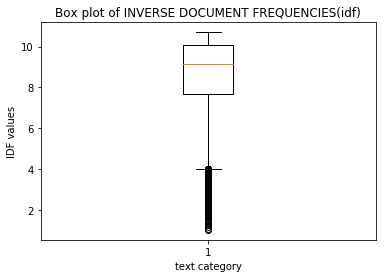

In [84]:

plt.boxplot(sorted_idf)
plt.title('Box plot of INVERSE DOCUMENT FREQUENCIES(idf)')
plt.xlabel('text category')
plt.ylabel('IDF values')
plt.show()

In [85]:
# Getting idf values in the IQR range(25% ,50% and 75%)
np.percentile(sorted_idf,[25,50,75])

array([ 7.65974152,  9.16381892, 10.09812815])

In [0]:
# extracting indices less than idf values 2 and greater than 9, to remove words having idf values in the given 
# range(2 and greater than 9)

indices_within_percentile=np.array(np.where(np.logical_or(sorted_idf<=2 , sorted_idf>=9)))

In [87]:
indices_within_percentile=indices_within_percentile.reshape(-1,1)
indices_within_percentile.shape

(11083, 1)

In [89]:

words_to_be_removed=[]
for i in tqdm(indices_within_percentile):
  a=sorted_indices[i]
  words_to_be_removed.append(feature_names[a])
  

  

100%|██████████| 11083/11083 [00:00<00:00, 568025.11it/s]


In [90]:
words_to_be_removed=np.array(words_to_be_removed,dtype=object)
words_to_be_removed

array([['students'],
       ['nannan'],
       ['school'],
       ...,
       ['lent'],
       ['laureates'],
       ['zuni']], dtype=object)

In [91]:
len(words_to_be_removed)

11083

In [0]:
# I found that even after removing the rare and common words,  'i', 'a', 'an', repeating in the sentences, So removing them
mostly_used=['i','a','an']

In [0]:
train_new_sentences=[]
for sen in tqdm(train_essay):
  words=[word for word in sen.split(' ') if word not in words_to_be_removed if word not in mostly_used]
  joined_sen=' '.join(words)
  train_new_sentences.append(joined_sen) 
  

In [0]:
# Storing the processed 'essay' in a csv file
dict={'processed_train_essay':train_new_sentences}
df=pd.DataFrame(dict)
df.to_csv('gdrive/My Drive/data/processed_idf.csv')

In [94]:
import pandas as pd
idf_df=pd.read_csv('gdrive/My Drive/data/processed_idf.csv')
idf_df.head(4)

,Unnamed: 0,processed_train_essay
0,0,dream big that motto especially first graders ...
1,1,sharks amazing group kids literally world chan...
2,2,motivated engaged ready discover world th grad...
3,3,enjoy participating group sports physical educ...


In [0]:
test_new_sentences=[]
for sen in tqdm(test_essay):
  words=[word for word in sen.split(' ') if word not in words_to_be_removed if word not in mostly_used]
  joined_sen=' '.join(words)
  test_new_sentences.append(joined_sen)

In [0]:
# Storing the processed 'essay' in a csv file
dict={'processed_test_essay':test_new_sentences}
df=pd.DataFrame(dict)
df.to_csv('gdrive/My Drive/data/processed_idf_test.csv')

In [95]:
# Retrieving the processed test essay that contain words in the IDR range
idf_df_test=pd.read_csv('gdrive/My Drive/data/processed_idf_test.csv')
idf_df_test.head(4)

,Unnamed: 0,processed_test_essay
0,0,there genuinely sufficient resources world ens...
1,1,can imagine life without lego bricks some firs...
2,2,as year moves second graders ready take new ex...
3,3,teach th grade special education low socioecon...


# Comparing new sentences with old ones

In [99]:
train_essay[69364]

'dream big that motto school especially first graders strive coming st grade brains ready grow undeniable enthusiasm school they strive everyday best selves and crown heights area title school need resources help now time help achieve goals identify readers i requesting sets leveled books a d benefit library three st grade classrooms by leveled texts classroom library students books choose as shop books access books different genres fit interest by donating project helping generate love reading attaining books go long way ensuring students build maintain important interest i thank advance desire make difference nannan'

In [100]:
idf_df['processed_train_essay'][0]

'dream big that motto especially first graders strive coming st grade brains ready grow undeniable enthusiasm strive everyday best selves and heights area title resources now time achieve goals identify readers requesting sets leveled books d benefit library three st grade classrooms by leveled texts library books choose as shop books access books different genres fit interest by donating project helping generate reading attaining books go long way ensuring build maintain important interest thank advance desire difference'

In [0]:
# TRAIN data
# Creating vocab for new sentences(after removal of rare and common words in the sentences)
tokenizer.fit_on_texts(idf_df['processed_train_essay'])
vocab_size_idf = len(tokenizer.word_index)
# Creating numbers for each word in the corpus
encoded_docs_idf = tokenizer.texts_to_sequences(idf_df['processed_train_essay'])
# Padding with max_length=100
max_length = 100
padded_docs_idf = pad_sequences(encoded_docs_idf, maxlen=max_length, padding='post')


In [102]:
padded_docs_idf[0]

array([ 873,  407,  635, 1824,  393,   59,  119,  353,  358,  443,   19,
       1034,  141,  174, 9675,  904,  353,  208,   40, 4115,  789, 2915,
        137,  108,   85, 1256,   14,  364,  269, 1407,  183,  347,  765,
        984,   10,  913,  249,  167,  461,  443,   19,  360,  177,  984,
        590,  167,   10,  288,  101, 2606,   10,   54,   10,   37, 1504,
        716,  328,  177,  805,   36,  346, 3410,    3, 6821,   10,  164,
        250,   43, 2684,  157, 1057,  129,  328,  385, 1143,  473,  381,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0], dtype=int32)

In [103]:
len(padded_docs_idf)

98323

In [0]:
# TEST data
# Creating numbers for each word in the corpus
encoded_docs_idf_test = tokenizer.texts_to_sequences(idf_df_test['processed_test_essay'])
# Padding with max_length=100
max_length = 100
padded_docs_idf_test = pad_sequences(encoded_docs_idf_test, maxlen=max_length, padding='post')

In [105]:
padded_docs_idf_test[0]

array([  278,  3802,  3084,    85,    31,   472,   168,    17,   168,
         168,    14,   164,   871,  2345, 54117,    32,   100,    62,
        2284,    59,   119,   988,   182,   384,   108,   975,  1903,
         334,   225,  1389,    50,   149,   655,    71,   196,   168,
         334,  5246,   473,    68,    65,     8,    27,   287,   614,
        1186,    42,   220,  2005,   829,   796,  2480,   163,    15,
         871,   490,   256,  1012,  1386,  1192,   256,     5,   230,
        1092,   796,   288,   295,   348,  1594,   499,    71,    38,
         302,    14,  1150,  2247,  3400,   166,   177,   805,    36,
          59,   119,  1272,  6210,  6422, 24023,   610,    23,   117,
         129,   526,     0,     0,     0,     0,     0,     0,     0,
           0], dtype=int32)

In [106]:
vocab_size_idf

56176

In [0]:
# create a weight matrix for words  in training docs in model 2

weight_matrix_2 = np.zeros((vocab_size_idf+1, 300))
for word, i in tokenizer.word_index.items():
  vector = model.get(word)
  if vector is not None:
		 weight_matrix_2[i] = vector 

In [0]:
# Define text input model 2
text_input_2 = Input(shape=(100,), name='text_input')
text_emb_2=(Embedding(input_dim=vocab_size_idf+1,output_dim=300,weights=[weight_matrix_2],input_length=100,trainable=False))(text_input_2)
text_lstm_2=(LSTM(100,return_sequences=True))(text_emb_2)
text_flatten_2=(Flatten())(text_lstm_2)



In [0]:
combined_2=concatenate([text_flatten_2,school_state_flatten,grade_flatten,category_flatten,subcategory_flatten,teacher_flatten,numerical_input_flatten])

In [0]:
# After combining layers
den1=Dense(units=300,activation='relu',kernel_initializer='glorot_uniform')(combined)
dropout1=Dropout(0.3)(den1)
den2=Dense(units=100,activation='relu',kernel_initializer='glorot_uniform')(dropout1)
bn1=BatchNormalization()(den2)
softmax_output=Dense(units=2,activation='softmax')(bn1)

In [0]:
model2=Model(inputs=[text_input,school_state_input,grade_input,category_input,subcategory_input,teacher_input,numerical_input],outputs=[softmax_output])

In [0]:
# check point path
checkpoint_path_2 = "gdrive/My Drive/data/weights_2/rms.ckpt"
# Create checkpoint callback

# Create checkpoint callback and store the best weights alone, discard updating the weights if the 'acc' does not improve
cp_callback = keras.callbacks.ModelCheckpoint(checkpoint_path_2,monitor='acc',
                                                 save_weights_only=True, save_best_only=True,
                                                 verbose=1)

In [0]:
rms=keras.optimizers.RMSprop(lr=0.001, rho=0.9)
# compiling the model
model2.compile(optimizer=rms,loss='categorical_crossentropy',metrics=['accuracy',au_roc])
model2.fit([train_padded_docs,encoded_train_state_value,encoded_train_grade_value,encoded_train_category_value,encoded_train_subcategory_value,encoded_train_teacher_value,
            train_num],y_train_ohe,validation_data=([test_padded_docs,encoded_test_state_value,encoded_test_grade_value,encoded_test_category_value,
                                                                    encoded_test_subcategory_value,encoded_test_teacher_value,test_num],y_test_ohe),epochs=15,batch_size=300,callbacks=[cp_callback])

Train on 98323 samples, validate on 10925 samples
Epoch 1/15
98323/98323 [==============================] - 483s 5ms/step - loss: 0.3881 - acc: 0.8379 - au_roc: 0.7704 - val_loss: 0.3852 - val_acc: 0.8416 - val_au_roc: 0.7445

Epoch 00001: acc improved from -inf to 0.83791, saving model to gdrive/My Drive/data/weights_1/arch3rms.ckpt
Epoch 2/15
98323/98323 [==============================] - 481s 5ms/step - loss: 0.2963 - acc: 0.8857 - au_roc: 0.8592 - val_loss: 0.4409 - val_acc: 0.8176 - val_au_roc: 0.7293

Epoch 00002: acc improved from 0.83791 to 0.88570, saving model to gdrive/My Drive/data/weights_1/arch3rms.ckpt
Epoch 3/15
98323/98323 [==============================] - 482s 5ms/step - loss: 0.2553 - acc: 0.9037 - au_roc: 0.9014 - val_loss: 0.5079 - val_acc: 0.7972 - val_au_roc: 0.7112

Epoch 00003: acc improved from 0.88570 to 0.90371, saving model to gdrive/My Drive/data/weights_1/arch3rms.ckpt
Epoch 4/15
98323/98323 [==============================] - 482s 5ms/step - loss: 0.2077

# In many epoch we get validation auc greater than 0.70 for model 2, so stopping the hyperparameter tuning

# <center> MODEL 3

In [114]:
project_data.columns

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price'],
      dtype='object')

In [0]:
# Train and test split
tr_state,te_state,tr_grade,te_grade,tr_cat,te_cat,tr_subcat,te_subcat,tr_teacher,te_teacher,tr_price,te_price,tr_posted,te_posted= train_test_split(project_data['school_state'].values,project_data['project_grade_category'].values,project_data['clean_categories'].values,
                                             project_data['clean_subcategories'].values,project_data['teacher_prefix'].values,project_data['price'].values,
                                             project_data['teacher_number_of_previously_posted_projects'].values,test_size=0.1,random_state=14)

In [0]:
# One hot encoder
one_hot_encoding=OneHotEncoder(handle_unknown='ignore')


In [0]:
# One Hot Encodong categorical features
tr_state_ohe=(one_hot_encoding.fit_transform((tr_state).reshape(-1,1)))
te_state_ohe=(one_hot_encoding.transform((te_state).reshape(-1,1)))


tr_grade_ohe=(one_hot_encoding.fit_transform(tr_grade.reshape(-1,1)))
te_grade_ohe=(one_hot_encoding.transform(te_grade.reshape(-1,1)))

tr_cat_ohe=(one_hot_encoding.fit_transform(tr_cat.reshape(-1,1)))
te_cat_ohe=(one_hot_encoding.transform(te_cat.reshape(-1,1)))


tr_subcat_ohe=(one_hot_encoding.fit_transform(tr_subcat.reshape(-1,1)))

te_subcat_ohe=(one_hot_encoding.transform(te_subcat.reshape(-1,1)))

tr_teacher_ohe=(one_hot_encoding.fit_transform(tr_teacher.reshape(-1,1)))
te_teacher_ohe=(one_hot_encoding.transform(te_teacher.reshape(-1,1)))

In [122]:
tr_cat_ohe.shape

(98323, 51)

In [123]:
print(tr_state_ohe.shape)
print(tr_grade_ohe.shape)
print(tr_cat_ohe.shape)
print(tr_subcat_ohe.shape)
print(tr_teacher_ohe.shape)


(98323, 51)
(98323, 4)
(98323, 51)
(98323, 397)
(98323, 5)


In [124]:
print(te_state_ohe.shape)
print(te_grade_ohe.shape)
print(te_cat_ohe.shape)
print(te_subcat_ohe.shape)
print(te_teacher_ohe.shape)

(10925, 51)
(10925, 4)
(10925, 51)
(10925, 397)
(10925, 5)


In [0]:
tr_price=tr_price.reshape(-1,1)
tr_posted=tr_posted.reshape(-1,1)
te_price=te_price.reshape(-1,1)
te_posted=te_posted.reshape(-1,1)

In [126]:
tr_price.shape

(98323, 1)

In [0]:
from scipy.sparse import hstack
X_train=hstack((tr_state_ohe,tr_grade_ohe,tr_cat_ohe,tr_subcat_ohe,tr_teacher_ohe,tr_price,tr_posted))

X_test=hstack((te_state_ohe,te_grade_ohe,te_cat_ohe,te_subcat_ohe,te_teacher_ohe,te_price,te_posted))

In [128]:
X_train=X_train.toarray()
X_test=X_test.toarray()
print(X_train.shape)
print(X_test.shape)

(98323, 510)
(10925, 510)


In [129]:
X_train=np.reshape(X_train,(98323,510,-1))
X_test=np.reshape(X_test,(10925,510,-1))
print(X_train.shape)
print(X_test.shape)

(98323, 510, 1)
(10925, 510, 1)


In [0]:
#defining the model
batch_size=300
numerical_input=Input(shape=(510,1))
conv1=Conv1D(filters=200, kernel_size=50, activation='relu', input_shape=(510,1))(numerical_input)
conv2=Conv1D(100, 50, activation='relu')(conv1)

conv3=Conv1D(100, 50, activation='relu')(conv2)
max_pool1=MaxPooling1D(5)(conv3)# output shape is  [30,100] 
conv4=Conv1D(100, 50, activation='relu')(max_pool1)
flatten3=Flatten()(conv4)

In [0]:
combined_3=concatenate([text_flatten,flatten3])

In [133]:
# After combining layers
den1=Dense(units=100,activation='relu',kernel_initializer='he_normal')(combined_3)
dropout1=Dropout(0.4)(den1)
den2=Dense(units=50,activation='relu',kernel_initializer='he_normal')(dropout1)
bn1=BatchNormalization()(den2)
dropout2=Dropout(0.3)(bn1)
den3=Dense(units=25,activation='relu',kernel_initializer='he_normal')(dropout2)
bn2=BatchNormalization()(den3)
den4=Dense(units=10,activation='relu',kernel_initializer='he_normal')(bn2)
bn3=BatchNormalization()(den4)
dropout3=Dropout(0.3)(bn3)
softmax_output=Dense(units=2,activation='softmax')(dropout3)

In [0]:
model3=Model(inputs=[text_input,numerical_input],outputs=[softmax_output])

In [0]:
adagrad=keras.optimizers.Adagrad(lr=0.01)
model3.compile(optimizer=adagrad,loss='categorical_crossentropy',metrics=['accuracy',au_roc])

In [136]:
model3.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 510, 1)       0                                            
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, 461, 200)     10200       input_8[0][0]                    
__________________________________________________________________________________________________
conv1d_6 (Conv1D)               (None, 412, 100)     1000100     conv1d_5[0][0]                   
__________________________________________________________________________________________________
text_input (InputLayer)         (None, 600)          0                                            
____________________________________________________________________________________________

In [141]:
# Getting the latest weights)
model3.load_weights("gdrive/My Drive/data/weights_3/cp.ckpt")
model3.fit([train_padded_docs,X_train],y_train_ohe,validation_data=([test_padded_docs,X_test],y_test_ohe),epochs=1,batch_size=500,callbacks = [cp_callback])

Train on 98323 samples, validate on 10925 samples
Epoch 1/1
98323/98323 [==============================] - 524s 5ms/step - loss: 0.3253 - acc: 0.8831 - au_roc: 0.8220 - val_loss: 0.4459 - val_acc: 0.8486 - val_au_roc: 0.7231

Epoch 00001: saving model to gdrive/My Drive/data/weights_3/cp.ckpt


# Validation auc is greater than 0.70, So stopping hyperparameter tuning